## Machine learning - Final Project - Classify Fraud/Non-Fraud transactions 

### Final Report

#### With SMOTE DATA - BEST MODEL - GRIDSEARCH HYPER PARAMETERS
best_model=RandomForestClassifier(max_depth=6, max_features= 'sqrt', n_estimators=250,random_state=123)

#### Best 5 Features in the order of feature importance
V14,V10,V11,V12,V17

#### Recall of Fraud class = 0.84, Macro Average = 0.92


In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('C:/Users/p_adu/Desktop/creditcard.csv')

In [3]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
y=data[['Class']]
X=data.drop('Class',axis=1)


In [5]:
def time(sec):
    day = sec // 86400 + 1
    if day <= 1:
        return round((sec / 60 / 60),2)
    else:
        return round(((sec - (24*60*60*(day-1))) / 60 / 60),2)

X['Time'] = X.apply(lambda row: time(row['Time']), axis=1)

In [7]:
X.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,0.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,0.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,0.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [6]:
from sklearn.model_selection import train_test_split, KFold,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression 
#V14, V11, V10, V17, V12If we take the Class column and sort the correlations by magnitude, we see that V17, V14, V12, and V10 rank pretty highly in terms of importance of determining whether a transaction is fraudulent (from a linear perspective).

In [6]:
from sklearn.model_selection import train_test_split
X_train_ori, X_test_ori, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [7]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE 
#import imblearn
k=1 # choosing number of minority classes
method = SMOTE(k_neighbors=k, sampling_strategy='auto', random_state = 1)

X_train_res, y_train_res = method.fit_sample(X_train_ori, y_train)

print("SMOTE X_train shape: {}".format(X_train_res.shape))
print("SMOTE y_train shape: {}".format(y_train_res.shape))

SMOTE X_train shape: (341156, 30)
SMOTE y_train shape: (341156, 1)


In [8]:
### SCALING DATA ####
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train_ori)
scaler.fit(X_test_ori)
X_train = scaler.transform(X_train_ori)
X_test = scaler.transform(X_test_ori)

### Scaling SMOTE train data as well ####
X_train_smote =scaler.transform(X_train_res)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {
 "max_depth":[3,4,5,6], "max_features":["sqrt"], "n_estimators": (250,300,350,400)
}
# create Random Forest model
rf_obj=RandomForestClassifier(random_state=123)
# Create gridsearch object with various combinations of parameters. Use 5 cross-fold and for scoring use "roc_auc"
rf_Grid = GridSearchCV(rf_obj, param_grid, cv = 5, scoring = 'recall',refit = True, n_jobs=-1, verbose = 5)

In [22]:
#Without SMOTE - GRIDSEARCH - IDENTIFYING PARAMETERS
results=rf_Grid.fit(X_train,y_train)
print("The best parameter values are \n", results.best_params_)
print("the best performing model are \n",results.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 84.4min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 103.2min finished
C:\Users\p_adu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The best parameter values are 
 {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 400}
the best performing model are 
 RandomForestClassifier(max_depth=6, max_features='sqrt', n_estimators=400,
                       random_state=123)


In [27]:
#With SMOTE - GRID SEARCH - IDENTIFYING PARAMETERS
results_1=rf_Grid.fit(X_train_smote,y_train_res)
print("The best parameter values are \n", results_1.best_params_)
print("the best performing model are \n",results_1.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 124.8min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 164.0min finished
C:\Users\p_adu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The best parameter values are 
 {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 250}
the best performing model are 
 RandomForestClassifier(max_depth=6, max_features='sqrt', n_estimators=250,
                       random_state=123)


In [11]:
#With SMOTE DATA - BEST MODEL - GRIDSEARCH HYPER PARAMETERS
best_model=RandomForestClassifier(max_depth=6, max_features= 'sqrt', n_estimators=250,random_state=123)
best_model_result_train=best_model.fit(X_train_smote,y_train_res)


C:\Users\p_adu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
best_predict_ytest = best_model_result_train.predict(X_test)
best_pred_ytest = best_model_result_train.predict_proba(X_test)

In [12]:
print("The Confusion matrix for test is \n", confusion_matrix(y_test, best_predict_ytest))
print("The Classification table for test is \n", classification_report(y_test,best_predict_ytest))

The Confusion matrix for test is 
 [[113397    340]
 [    28    158]]
The Classification table for test is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.32      0.85      0.46       186

    accuracy                           1.00    113923
   macro avg       0.66      0.92      0.73    113923
weighted avg       1.00      1.00      1.00    113923



In [13]:
best_predict_ytest = best_model_result_train.predict(X_test_ori)
best_pred_ytest = best_model_result_train.predict_proba(X_test_ori)

In [14]:
print("The Confusion matrix for test is \n", confusion_matrix(y_test, best_predict_ytest))
print("The Classification table for test is \n", classification_report(y_test,best_predict_ytest))

The Confusion matrix for test is 
 [[113540    197]
 [    31    155]]
The Classification table for test is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.44      0.83      0.58       186

    accuracy                           1.00    113923
   macro avg       0.72      0.92      0.79    113923
weighted avg       1.00      1.00      1.00    113923



In [10]:
#Re-running for train and test 
#With SMOTE DATA - BEST MODEL - GRIDSEARCH HYPER PARAMETERS
best_model=RandomForestClassifier(max_depth=6, max_features= 'sqrt', n_estimators=250,random_state=123)
best_model_result_train=best_model.fit(X_train_smote,y_train_res)
best_predict_ytest = best_model_result_train.predict(X_test)
best_pred_ytest = best_model_result_train.predict_proba(X_test)

C:\Users\p_adu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
print("The Confusion matrix for test is \n", confusion_matrix(y_test, best_predict_ytest))
print("The Classification table for test is \n", classification_report(y_test,best_predict_ytest))

The Confusion matrix for test is 
 [[113340    397]
 [    29    157]]
The Classification table for test is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.28      0.84      0.42       186

    accuracy                           1.00    113923
   macro avg       0.64      0.92      0.71    113923
weighted avg       1.00      1.00      1.00    113923



In [12]:
#Re-running for train and test
best_model=RandomForestClassifier(max_depth=6, max_features= 'sqrt', n_estimators=250,random_state=123)
best_model_result_train=best_model.fit(X_train_res,y_train_res)
best_predict_ytrain = best_model_result_train.predict(X_train)
best_pred_ytrain = best_model_result_train.predict_proba(X_train)

C:\Users\p_adu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
best_predict_ytrain = best_model_result_train.predict(X_train)
best_pred_ytrain = best_model_result_train.predict_proba(X_train)

In [19]:
best_predict_ytrain = best_model_result_train.predict(X)
best_pred_ytrain = best_model_result_train.predict_proba(X)

In [20]:
print("The Confusion matrix for test is \n", confusion_matrix(y, best_predict_ytrain))
print("The Classification table for test is \n", classification_report(y,best_predict_ytrain))

The Confusion matrix for test is 
 [[283843    472]
 [    71    421]]
The Classification table for test is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.47      0.86      0.61       492

    accuracy                           1.00    284807
   macro avg       0.74      0.93      0.80    284807
weighted avg       1.00      1.00      1.00    284807



In [17]:
best_predict_ytrain = best_model_result_train.predict(X_train_ori)
best_pred_ytrain = best_model_result_train.predict_proba(X_train_ori)

In [18]:
print("The Confusion matrix for test is \n", confusion_matrix(y_train, best_predict_ytrain))
print("The Classification table for test is \n", classification_report(y_train,best_predict_ytrain))

The Confusion matrix for test is 
 [[170303    275]
 [    40    266]]
The Classification table for test is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170578
           1       0.49      0.87      0.63       306

    accuracy                           1.00    170884
   macro avg       0.75      0.93      0.81    170884
weighted avg       1.00      1.00      1.00    170884



In [13]:
print("The Confusion matrix for test is \n", confusion_matrix(y_train, best_predict_ytrain))
print("The Classification table for test is \n", classification_report(y_train,best_predict_ytrain))

The Confusion matrix for test is 
 [[169969    609]
 [    34    272]]
The Classification table for test is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    170578
           1       0.31      0.89      0.46       306

    accuracy                           1.00    170884
   macro avg       0.65      0.94      0.73    170884
weighted avg       1.00      1.00      1.00    170884



In [21]:
#WithOUT SMOTE DATA - BEST MODEL - GRIDSEARCH HYPER PARAMETERS
best_model_1=RandomForestClassifier(max_depth=6, max_features= 'sqrt', n_estimators=400,random_state=123)
best_model_result_train_1=best_model_1.fit(X_train,y_train)
best_predict_ytest_1 = best_model_result_train_1.predict(X_test)
best_pred_ytest_1 = best_model_result_train_1.predict_proba(X_test)

C:\Users\p_adu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
#With SMOTE DATA - BEST MODEL - GRID SEARCH - FINAL REPORT
print("The Confusion matrix for test is \n", confusion_matrix(y_test, best_predict_ytest))
print("The Classification table for test is \n", classification_report(y_test,best_predict_ytest))


The Confusion matrix for test is 
 [[113340    397]
 [    29    157]]
The Classification table for test is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.28      0.84      0.42       186

    accuracy                           1.00    113923
   macro avg       0.64      0.92      0.71    113923
weighted avg       1.00      1.00      1.00    113923



In [24]:
#WithOUT SMOTE DATA - BEST MODEL - GRID SEARCH - FINAL REPORT
print("The Confusion matrix for test is \n", confusion_matrix(y_test, best_predict_ytest_1))
print("The Classification table for test is \n", classification_report(y_test,best_predict_ytest_1))


The Confusion matrix for test is 
 [[113725     12]
 [    55    131]]
The Classification table for test is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.92      0.70      0.80       186

    accuracy                           1.00    113923
   macro avg       0.96      0.85      0.90    113923
weighted avg       1.00      1.00      1.00    113923



In [30]:
print((X_test_ori.columns[sorted_indices]))

Index(['V26', 'V25', 'V24', 'V22', 'V13', 'V20', 'Time', 'V15', 'V28', 'V23',
       'V19', 'V5', 'V1', 'V18', 'V27', 'V21', 'V6', 'V8', 'Amount', 'V2',
       'V9', 'V7', 'V16', 'V3', 'V4', 'V17', 'V12', 'V11', 'V10', 'V14'],
      dtype='object')


In [32]:
print((X_test_ori.columns[sorted_indices][25:30]))

Index(['V17', 'V12', 'V11', 'V10', 'V14'], dtype='object')


In [35]:
y_pos = range(len(rf_importances))
y_pos

range(0, 30)

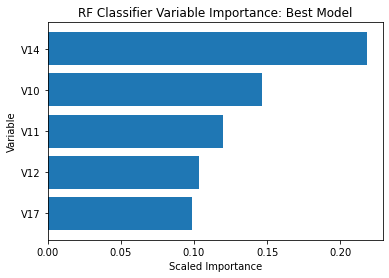

In [37]:
import matplotlib.pyplot as plt
rf_importances = best_model_result_train.feature_importances_
#print("As expected, we get an output of", len(rf_importances), "variables")
###Create a variable importance plot
### rearrange the indices by importance of the specific feature
sorted_indices = np.argsort(rf_importances)
####create range of 0-29
#y_pos = range(len(rf_importances))
y_pos=range(0,5)
# plotting
plt.barh(y_pos, rf_importances[sorted_indices][25:30], align='center')
plt.yticks(y_pos,X_test_ori.columns[sorted_indices][25:30])
plt.title("RF Classifier Variable Importance: Best Model") # title
plt.xlabel("Scaled Importance") #x axis label
plt.ylabel("Variable") # y axis label
plt.show()

In [1]:
#import pickle
#loaded_model_Grad = pickle.load(open("C:/Users/p_adu/Desktop/GradModelSMOTE.pickle.dat", "rb"))
#print("Loaded model")

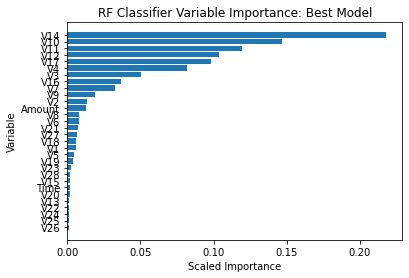

In [20]:
#With SMOTE - BEST MODEL FEATURE IMPORTANCE - GRID SEARCH 
import matplotlib.pyplot as plt
rf_importances = best_model_result_train.feature_importances_
#print("As expected, we get an output of", len(rf_importances), "variables")
###Create a variable importance plot
### rearrange the indices by importance of the specific feature
sorted_indices = np.argsort(rf_importances)
####create range of 0-29
y_pos = range(len(rf_importances))
# plotting
plt.barh(y_pos, rf_importances[sorted_indices], align='center')
plt.yticks(y_pos,X_test_ori.columns[sorted_indices])
plt.title("RF Classifier Variable Importance: Best Model") # title
plt.xlabel("Scaled Importance") #x axis label
plt.ylabel("Variable") # y axis label
plt.show()

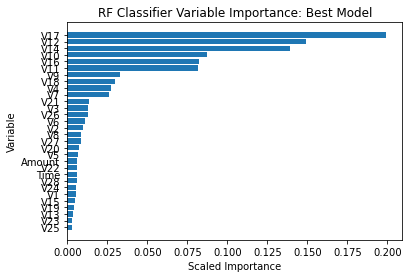

In [22]:
#Without SMOTE - BEST MODEL FEATURE IMPORTANCE - GRID SEARCH 
rf_importances = best_model_result_train_1.feature_importances_
import matplotlib.pyplot as plt
#print("As expected, we get an output of", len(rf_importances), "variables")
###Create a variable importance plot
### rearrange the indices by importance of the specific feature
sorted_indices = np.argsort(rf_importances)
####create range of 0-29
y_pos = range(len(rf_importances))
# plotting
plt.barh(y_pos, rf_importances[sorted_indices], align='center')
plt.yticks(y_pos,X_test_ori.columns[sorted_indices])
plt.title("RF Classifier Variable Importance: Best Model") # title
plt.xlabel("Scaled Importance") #x axis label
plt.ylabel("Variable") # y axis label
plt.show()

In [36]:
#With SMOTE DATA - RANDOMiZEDCV SEARCH RUN - IDENTIFYING BEST MODEL PARAMETERS
results=rf_Grid_2.fit(X_train_res,y_train_res)
print("The best parameter values are \n", results.best_params_)
print("the best performing model are \n",results.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 52.4min finished
C:\Users\p_adu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The best parameter values are 
 {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 5}
the best performing model are 
 RandomForestClassifier(max_depth=5, max_features='sqrt', random_state=123)


In [50]:
#WITHOUT SMOTE DATA - RANDOMIZEDCV SEARCH - IDENTIFYING BEST MODEL PARAMETERS
results=rf_Grid_2.fit(X_train,y_train)
print("The best parameter values are \n", results.best_params_)
print("the best performing model are \n",results.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 31.3min finished
C:\Users\p_adu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


The best parameter values are 
 {'n_estimators': 250, 'max_features': 'sqrt', 'max_depth': 4}
the best performing model are 
 RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=250,
                       random_state=123)


In [37]:
#With SMOTE DATA - RANDOMIZEDCV SEARCH RUN - BEST MODEL RUN
best_model=RandomForestClassifier(max_depth=5, max_features= 'sqrt', n_estimators=100,random_state=123)
best_model_result_train=best_model.fit(X_train_res,y_train_res)
best_predict_ytest = best_model_result_train.predict(X_test)
best_pred_ytest = best_model_result_train.predict_proba(X_test)

C:\Users\p_adu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [51]:
#WithOUT SMOTE DATA - RANDOMIZEDCV SEARCH - BEST MODEL RUN
best_model_1=RandomForestClassifier(max_depth=4, max_features= 'sqrt', n_estimators=250,random_state=123)
best_model_result_train_1=best_model_1.fit(X_train,y_train)
best_predict_ytest_1 = best_model_result_train_1.predict(X_test)
best_pred_ytest_1 = best_model_result_train_1.predict_proba(X_test)

C:\Users\p_adu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
#With SMOTE DATA - RANDOMIZEDCV SEARCH - FINAL REPORT
print("The Confusion matrix for test is \n", confusion_matrix(y_test, best_predict_ytest_1))
print("The Classification table for test is \n", classification_report(y_test,best_predict_ytest_1))


The Confusion matrix for test is 
 [[113419    318]
 [    28    158]]
The Classification table for test is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.33      0.85      0.48       186

    accuracy                           1.00    113923
   macro avg       0.67      0.92      0.74    113923
weighted avg       1.00      1.00      1.00    113923



In [52]:
#WithOUT SMOTE DATA - RANDOMIZEDCV SEARCH - FINAL REPORT
print("The Confusion matrix for test is \n", confusion_matrix(y_test, best_predict_ytest_1))
print("The Classification table for test is \n", classification_report(y_test,best_predict_ytest_1))


The Confusion matrix for test is 
 [[113719     18]
 [    63    123]]
The Classification table for test is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.87      0.66      0.75       186

    accuracy                           1.00    113923
   macro avg       0.94      0.83      0.88    113923
weighted avg       1.00      1.00      1.00    113923



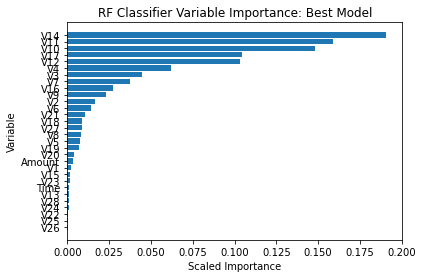

In [48]:
#With SMOTE - RANDOMIZEDSEARCHCV - FEATURE IMPORTANCE
rf_importances = best_model_result_train.feature_importances_
#print("As expected, we get an output of", len(rf_importances), "variables")
###Create a variable importance plot
### rearrange the indices by importance of the specific feature
sorted_indices = np.argsort(rf_importances)
####create range of 0-29
y_pos = range(len(rf_importances))
# plotting
plt.barh(y_pos, rf_importances[sorted_indices], align='center')
plt.yticks(y_pos,X_test_ori.columns[sorted_indices])
plt.title("RF Classifier Variable Importance: Best Model") # title
plt.xlabel("Scaled Importance") #x axis label
plt.ylabel("Variable") # y axis label
plt.show()

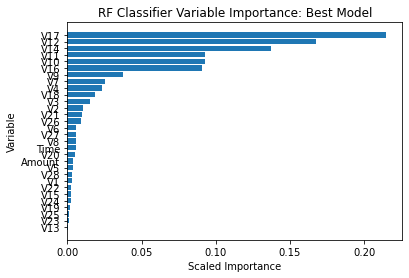

In [53]:
#Without SMOTE - RANDOMIZEDCV SEARCH - FEATURE IMPORTANCE 
rf_importances = best_model_result_train_1.feature_importances_
#print("As expected, we get an output of", len(rf_importances), "variables")
###Create a variable importance plot
### rearrange the indices by importance of the specific feature
sorted_indices = np.argsort(rf_importances)
####create range of 0-29
y_pos = range(len(rf_importances))
# plotting
plt.barh(y_pos, rf_importances[sorted_indices], align='center')
plt.yticks(y_pos,X_test_ori.columns[sorted_indices])
plt.title("RF Classifier Variable Importance: Best Model") # title
plt.xlabel("Scaled Importance") #x axis label
plt.ylabel("Variable") # y axis label
plt.show()

In [ ]:
V17,V12,V14,V11,V10